In [46]:
#Gerekli Kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# SORU 1

Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurementsları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.


<ul>
<li>nominal value: İsimsel gruplama ölçeği, adlandırma ölçeği olarak da anılan sınıflama ölçeği; değişkenleri belirli bir özelliğe göre sınıflandırmak, gruplandırmak ve bu özelliğe göre de adlandırmak için yapılan ölçme işlemlerinde kullanılır.</li>
<li>ordinal value: Bu ölçme düzeyinde sınıflama ölçeğine ek olarak, değişkenler belirli bir biçimde veya kritere göre sıralanabilmektedir. </li>
<li>interval value: Bu ölçekte birimler aralık değerine göre gruplandırılır ve ölçüm değerleri arasında anlamlı ve standart aralıklar bulunmaktadır. Sayılar arasındaki farklar anlamlıdır. </li>
<li>ratio value: Metre ile yapılan ölçümler, kilo ile yapılan ölçümler, hasta sayısı, hız, gelir gibi değişkenler bu ölçme düzeyinde ölçülür. </li>
</ul>

In [47]:
df = {
    'education status': ['High School', 'Associate Degree', 'Bachelor’s Degree', 'Master’s Degree', 'Doctoral Degree'],
    'marital status': ['Single', 'Married', 'Divorced', 'Widow','Null',],
    'Credit Score': [300, 400, 400, 600,700],
    'Age': [20, 30, 40, 50, 60]
     }
row_labels = [101, 102, 103, 104, 105]

In [48]:
df = pd.DataFrame(data=df, index=row_labels)
df

,education status,marital status,Credit Score,Age
101,High School,Single,300,20
102,Associate Degree,Married,400,30
103,Bachelor’s Degree,Divorced,400,40
104,Master’s Degree,Widow,600,50
105,Doctoral Degree,Null,700,60


# SORU 2

Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım. 

In [8]:
data = pd.read_csv('/Users/macbook/Downloads/data.csv')

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<ul>
    <li>.info() metodu, toplam satır sayısına, sütunlardaki null olmayan değerlerin sayısına, özelliklerin türüne hızlıca bir bakış için kullanışlıdır:</li>
<ul>   

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
# null values kontrolü.
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<ul>
<li>Tüm özelliklerin(columns) olması gereken tipte olduğunu görürüz.
Unnamed: 32 ve id isminde gereksiz bir özellik var, bundan kurtulmalıyız.</li>
<li>Eksik verimiz yok. Eğer olsaydı, problemimize göre çözüm üretmemiz gerekecekti. </li>
</ul>

In [12]:
data.drop("Unnamed: 32", axis=1, inplace=True)
data.drop('id',axis=1, inplace=True)

In [13]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<ul>
    <li>Aşağıda yer alan tabloya bakarak bağımsız değişkenlerin dağılımı, standart sapması, ortalama değerine bakarak yayılımı hakkında fikir sahibi olabilirsiniz.</li>
<ul>

In [14]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


B    357
M    212
Name: diagnosis, dtype: int64

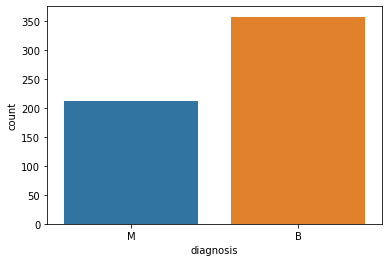

In [15]:
#visualizing the amount of Malignant and Benignant tumours in our dataset.
sns.countplot(data['diagnosis'])
data['diagnosis'].value_counts()

<ul>
<li>Elimizde 2 farklı sınıf (kanser / kanser değil) olduğu için dağılımların bazıları, büyük ihtimalle, iki sınıf için birbirinden farklı dağılımlar gösterecektir. Özelliklerin dağılımlarının sınıflara göre değişimine bir bakmak hiç fena olmaz. Bunu da şöyle yapabiliriz:</li>
</ul>    

In [16]:
#DataFrame bening ve malignant olarak ikiye ayırmak için filtrelendi. 
data_bening = data[data["diagnosis"] =="B"] 
data_malignant = data[data["diagnosis"] =="M"] 

# column = radius_mean

In [17]:
desc_b = data_bening.radius_mean.describe()
desc_m = data_malignant.radius_mean.describe()
print(desc_b)
print(desc_m)

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64
count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: radius_mean, dtype: float64


In [18]:
Q1 = desc_b[4]
Q3 = desc_b[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Bening Outlier ranges: ", lower_bound, "and", upper_bound)
print("Bening Outliers: ", data_bening[(data_bening.radius_mean<lower_bound) | (data_bening.radius_mean>upper_bound)].radius_mean.values)

Bening Outlier ranges:  7.645000000000001 and 16.805
Bening Outliers:  [ 6.981 16.84  17.85 ]


In [19]:
Q1 = desc_m[4]
Q3 = desc_m[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Malignant Outlier ranges: ", lower_bound, "and", upper_bound)
print("Malignant Outliers: ", data_malignant[(data_malignant.radius_mean<lower_bound) | (data_malignant.radius_mean>upper_bound)].radius_mean.values)

Malignant Outlier ranges:  8.302500000000002 and 26.362499999999997
Malignant Outliers:  [27.22 28.11 27.42]


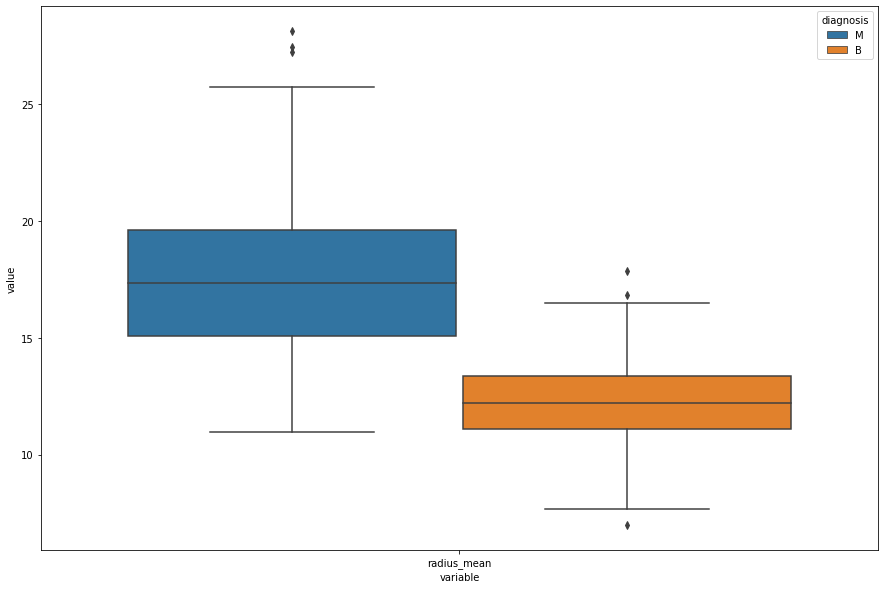

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

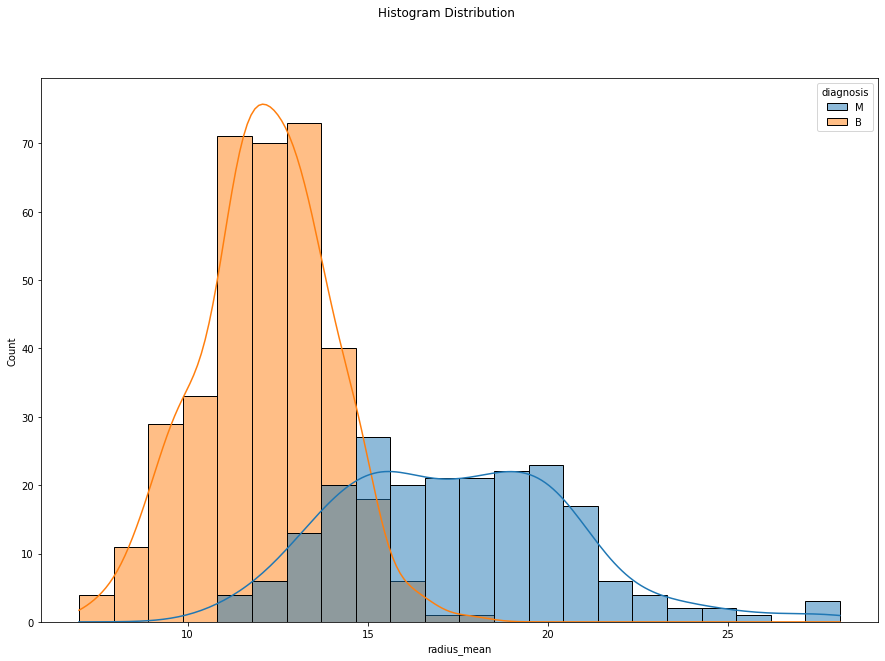

In [20]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()
fig,axes = plt.subplots(1, figsize=(15, 10), sharey=True)
fig.suptitle('Histogram Distribution')
sns.histplot( data=data , x='radius_mean' , kde = True , hue="diagnosis")

# column = area_mean

In [21]:
desc_b = data_bening.area_mean.describe()
desc_m = data_malignant.area_mean.describe()
print(desc_b)
print(desc_m)

count    357.000000
mean     462.790196
std      134.287118
min      143.500000
25%      378.200000
50%      458.400000
75%      551.100000
max      992.100000
Name: area_mean, dtype: float64
count     212.000000
mean      978.376415
std       367.937978
min       361.600000
25%       705.300000
50%       932.000000
75%      1203.750000
max      2501.000000
Name: area_mean, dtype: float64


In [22]:
Q1 = desc_b[4]
Q3 = desc_b[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Bening Outlier ranges: ", lower_bound, "and", upper_bound)
print("Bening Outliers: ", data_bening[(data_bening.area_mean<lower_bound) | (data_bening.area_mean>upper_bound)].area_mean.values)

Bening Outlier ranges:  118.84999999999997 and 810.45
Bening Outliers:  [880.2 838.1 992.1 819.8]


In [23]:
Q1 = desc_m[4]
Q3 = desc_m[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Malignant Outlier ranges: ", lower_bound, "and", upper_bound)
print("Malignant Outliers: ", data_malignant[(data_malignant.area_mean<lower_bound) | (data_malignant.area_mean>upper_bound)].area_mean.values)

Malignant Outlier ranges:  -42.374999999999886 and 1951.425
Malignant Outliers:  [2250. 2499. 2010. 2501.]


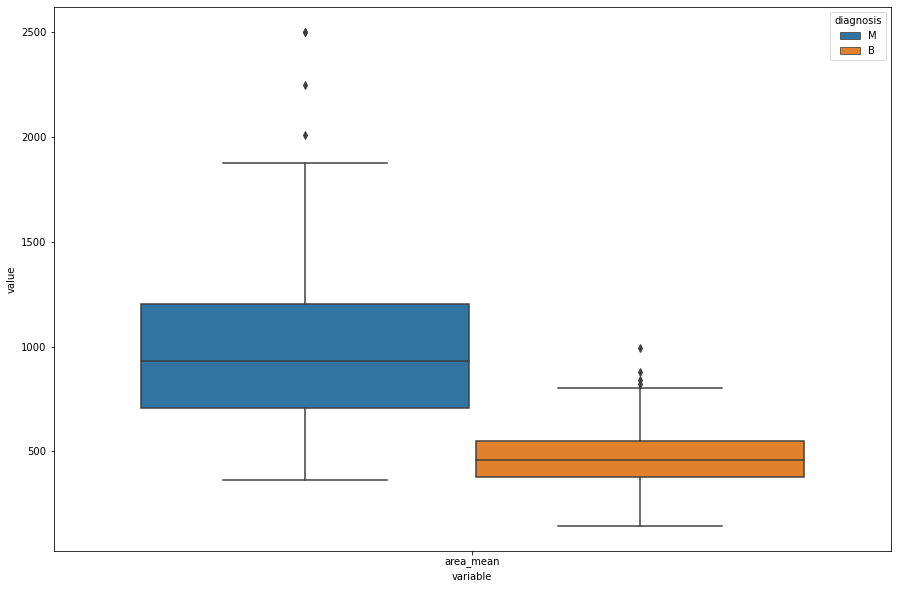

<AxesSubplot:xlabel='area_mean', ylabel='Count'>

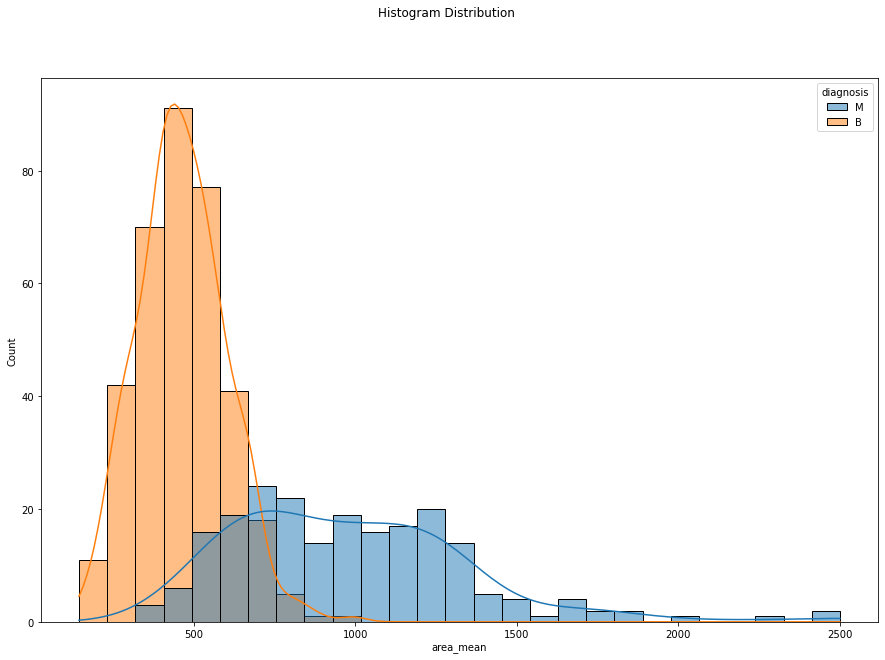

In [24]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['area_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()
fig,axes = plt.subplots(1, figsize=(15, 10), sharey=True)
fig.suptitle('Histogram Distribution')
sns.histplot( data=data , x='area_mean' , kde = True , hue="diagnosis")

# column = compactness_mean

In [25]:
desc_b = data_bening.compactness_mean.describe()
desc_m = data_malignant.compactness_mean.describe()
print(desc_b)
print(desc_m)

count    357.000000
mean       0.080085
std        0.033750
min        0.019380
25%        0.055620
50%        0.075290
75%        0.097550
max        0.223900
Name: compactness_mean, dtype: float64
count    212.000000
mean       0.145188
std        0.053987
min        0.046050
25%        0.109600
50%        0.132350
75%        0.172400
max        0.345400
Name: compactness_mean, dtype: float64


In [26]:
Q1 = desc_b[4]
Q3 = desc_b[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Bening Outlier ranges: ", lower_bound, "and", upper_bound)
print("Bening Outliers: ", data_bening[(data_bening.compactness_mean<lower_bound) | (data_bening.compactness_mean>upper_bound)].compactness_mean.values)

Bening Outlier ranges:  -0.00727499999999999 and 0.160445
Bening Outliers:  [0.2233 0.1807 0.1676 0.1972 0.166  0.1836 0.2239 0.2204 0.1661]


In [27]:
Q1 = desc_m[4]
Q3 = desc_m[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Malignant Outlier ranges: ", lower_bound, "and", upper_bound)
print("Malignant Outliers: ", data_malignant[(data_malignant.compactness_mean<lower_bound) | (data_malignant.compactness_mean>upper_bound)].compactness_mean.values)

Malignant Outlier ranges:  0.015399999999999983 and 0.2666
Malignant Outliers:  [0.2776 0.2839 0.3454 0.2768 0.2867 0.2832 0.3114 0.277 ]


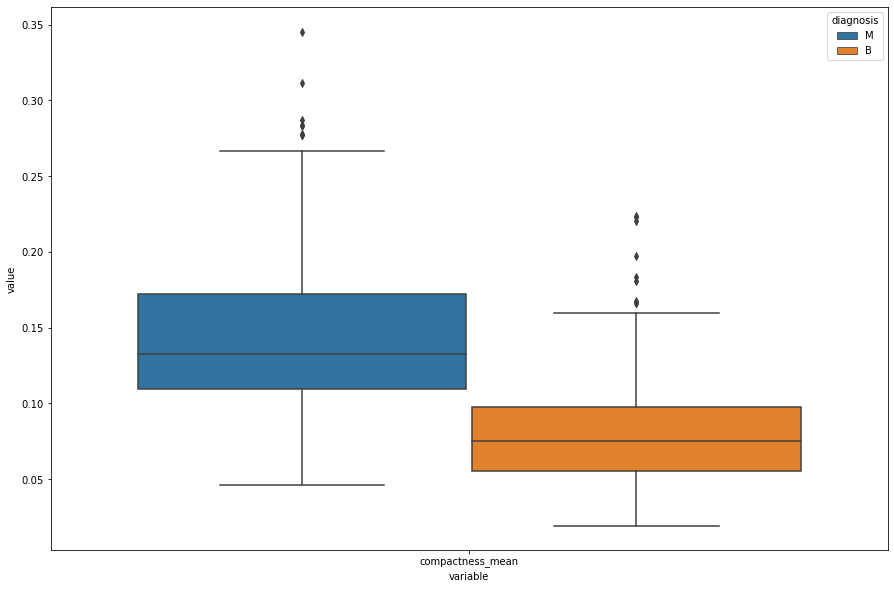

<AxesSubplot:xlabel='compactness_mean', ylabel='Count'>

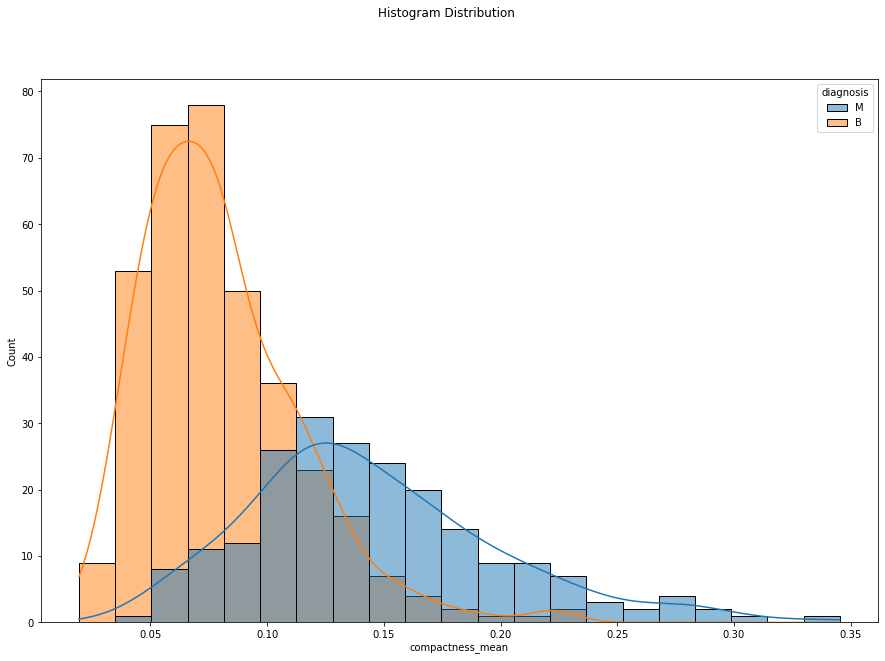

In [28]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['compactness_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()
fig,axes = plt.subplots(1, figsize=(15, 10), sharey=True)
fig.suptitle('Histogram Distribution')
sns.histplot( data=data , x='compactness_mean' , kde = True , hue="diagnosis")

------DEGERLENDIRME VE YORUM------

XXXX

# SORU 3

Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım. 

# Correlation

<ul>
<li>Korelasyon, kovaryans gibi iki değişkenin birbirleriyle olan ilişkisini açıklayan istatistiksel bir ölçüdür.</li><li>Korelasyon, bir değişkenin değeri değiştiği zaman, aralarındaki ilişkiye göre diğer değişkenin de belli bir yönde değişiklik göstereceğini belirtir. </li>
<li>Birim farklılarından etkilenmeyen, güçlü bir ölçüm yöntemi olduğu için korelasyon kovaryanstan farklı olarak, sadece ilişkinin yönünü değil aynı zamanda ilişkinin kuvvetini de ölçmeye ve karşılaştırmaya olanak sağlar.</li>
</ul>

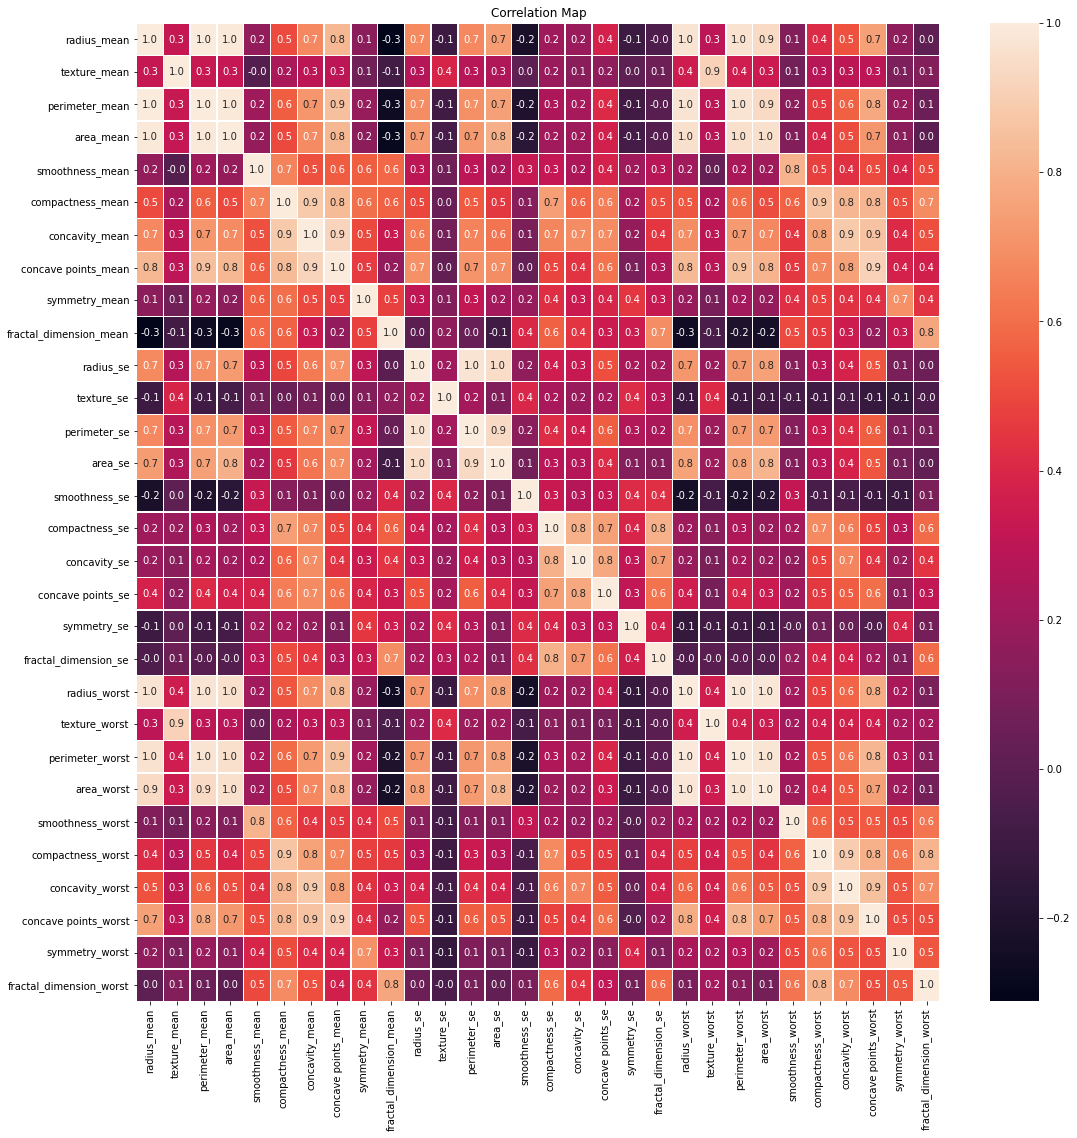

In [29]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [30]:
# İstenilen kolonlar üzerinde çalışmak için elimizdeki dataframe'e filtre uygulandı. 
# Bening veride değişkenler arasındaki korelasyon matrisi elde edildi.
selected_columns = ['radius_mean','area_mean','compactness_mean']
filtered_datab =data_bening[selected_columns]
filtered_datab.corr()

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.994435,0.060442
area_mean,0.994435,1.000000,0.052353
compactness_mean,0.060442,0.052353,1.000000


In [31]:
# Malignant veride değişkenler arasındaki korelasyon matrisi elde edildi.
filtered_datam =data_malignant[selected_columns]
filtered_datam.corr()

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.990078,0.169168
area_mean,0.990078,1.000000,0.170181
compactness_mean,0.169168,0.170181,1.000000


# Covariance

<ul>
<li>İki değişken arasındaki ilişki kovaryans yardımı ile ölçülür. </li>
<li>Kovaryans, iki değişkenin birbirine göre nasıl değiştiğinin ölçüsüdür. </li>
<li>Pozitif bir kovaryans değeri, iki değişkenin birlikte hareket ettiğini (azaldığını veya arttığını) gösterir.</li>
<li>Negatif bir kovaryans değeri ise iki değişkenin birlikte hareket etmediğini, yani ters yönde hareket ettiğini (biri azalırken diğeri artar veya biri artarken diğeri azalır) gösterir.</li>
</ul>    

radius_mean ile area_mean arasındaki kovaryansa bakalım.
Daha sonra radius_mean - compactness_mean ve area_mean - compactness_mean arasındaki boyutlara göz atalım.

In [32]:
np.cov(filtered_datam.radius_mean,filtered_datam.area_mean)
print("Covariance between radius mean and area mean: ",filtered_datam.radius_mean.cov(filtered_datam.area_mean))
print("Covariance between radius mean and compactness mean: ",filtered_datam.radius_mean.cov(filtered_datam.compactness_mean))
print("Covariance between area mean and compactness mean: ",filtered_datam.area_mean.cov(filtered_datam.compactness_mean))

Covariance between radius mean and area mean:  1167.16650308504
Covariance between radius mean and compactness mean:  0.029261743271036394
Covariance between area mean and compactness mean:  3.380481103863004


In [33]:
np.cov(filtered_datab.radius_mean,filtered_datab.area_mean)
print("Covariance between radius mean and area mean: ",filtered_datab.radius_mean.cov(filtered_datab.area_mean))
print("Covariance between radius mean and compactness mean: ",filtered_datab.radius_mean.cov(filtered_datab.compactness_mean))
print("Covariance between area mean and compactness mean: ",filtered_datab.area_mean.cov(filtered_datab.compactness_mean))

Covariance between radius mean and area mean:  237.76916020599262
Covariance between radius mean and compactness mean:  0.0036321118980738353
Covariance between area mean and compactness mean:  0.237273320720423


# Pearson Correlation Coefficient

<ul>
<li>Pearson korelasyon kat sayısı, iki sürekli değişken arasındaki doğrusal bir ilişkinin gücünü ve yönünü gösterir. </li>
<li>area_mean - radius_mean - compactness_mean arasındaki pearson korelasyonuna bakalım.(cov(A,B)/(std(A)*std(B))) </li>
<li>Öncelikle korelasyon kısmında kullandığımız .corr() metodunu kullanalım.</li>
Area_mean ve area_mean arasındaki pearson korelasyonunu beklediğimiz gibi, bu, aynı dağılım oldukları anlamına gelir.
<li>Ayrıca area_mean ile radius_mean arasındaki pearson korelasyonu 0.99'dur, bu da birbirleriyle pozitif korelasyon içinde oldukları ve aralarındaki ilişkinin çok yüksek olduğu anlamına gelir.</li>
<li>Daha açık olmak gerekirse, korelasyon bölümünde yaptığımız şey ve pearson korelasyon bölümünde yaptığımız şey aynı.</li>
</ul>

In [34]:
p1 = filtered_datab.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = filtered_datab.loc[:,["area_mean","compactness_mean"]].corr(method= "pearson")
p3 = filtered_datab.loc[:,["radius_mean","compactness_mean"]].corr(method= "pearson")

print('Pearson correlation:',p1)
print('------------------------------------')
print('Pearson correlation:',p2)
print('------------------------------------')
print('Pearson correlation:',p3)

Pearson correlation:              area_mean  radius_mean
area_mean     1.000000     0.994435
radius_mean   0.994435     1.000000
------------------------------------
Pearson correlation:                   area_mean  compactness_mean
area_mean          1.000000          0.052353
compactness_mean   0.052353          1.000000
------------------------------------
Pearson correlation:                   radius_mean  compactness_mean
radius_mean          1.000000          0.060442
compactness_mean     0.060442          1.000000


In [35]:
p1 = filtered_datam.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = filtered_datam.loc[:,["area_mean","compactness_mean"]].corr(method= "pearson")
p3 = filtered_datam.loc[:,["radius_mean","compactness_mean"]].corr(method= "pearson")

print('Pearson correlation:',p1)
print('------------------------------------')
print('Pearson correlation:',p2)
print('------------------------------------')
print('Pearson correlation:',p3)

Pearson correlation:              area_mean  radius_mean
area_mean     1.000000     0.990078
radius_mean   0.990078     1.000000
------------------------------------
Pearson correlation:                   area_mean  compactness_mean
area_mean          1.000000          0.170181
compactness_mean   0.170181          1.000000
------------------------------------
Pearson correlation:                   radius_mean  compactness_mean
radius_mean          1.000000          0.169168
compactness_mean     0.169168          1.000000


# Spearman's Rank Correlation

<ul>
<li>Spearman korelasyon katsayısı, değişkenlerden birinin sıralı (ordinal) veri tipine sahip olduğu veya Pearson korelasyon katsayısının varsayımlarını sağlanamadığı durumlarda kullanılmalıdır. </li>
<li>Spearman korelasyon katsayısı, Pearson’dan farklı olarak sadece doğrusal ilişkileri değil, monoton ilişkileri de ölçmekte kullanılır.</li>
<li>Non-parametrik yani verinin normal dağıldığı varsayımına ihtiyaç duymayan bir testtir. </li>
<li>Pearson korelasyonu aykırı değerlerden etkilenebilir. Spearman'ın korelasyonu daha sağlamdır.</li>
<ul>    

In [36]:
ranked_data = filtered_datam.rank()
spearman_corr1 = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
spearman_corr2 = ranked_data.loc[:,["area_mean","compactness_mean"]].corr(method= "pearson")
spearman_corr3 = ranked_data.loc[:,["radius_mean","compactness_mean"]].corr(method= "pearson")
print("Spearman's correlation:", spearman_corr1)
print('------------------------')
print("Spearman's correlation:", spearman_corr2)
print('------------------------')
print("Spearman's correlation:", spearman_corr3)

Spearman's correlation:              area_mean  radius_mean
area_mean     1.000000     0.998788
radius_mean   0.998788     1.000000
------------------------
Spearman's correlation:                   area_mean  compactness_mean
area_mean          1.000000          0.101147
compactness_mean   0.101147          1.000000
------------------------
Spearman's correlation:                   radius_mean  compactness_mean
radius_mean          1.000000          0.114265
compactness_mean     0.114265          1.000000


In [37]:
ranked_data = filtered_datab.rank()
spearman_corr1 = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
spearman_corr2 = ranked_data.loc[:,["area_mean","compactness_mean"]].corr(method= "pearson")
spearman_corr3 = ranked_data.loc[:,["radius_mean","compactness_mean"]].corr(method= "pearson")
print("Spearman's correlation:", spearman_corr1)
print('------------------------')
print("Spearman's correlation:", spearman_corr2)
print('------------------------')
print("Spearman's correlation:", spearman_corr3)

Spearman's correlation:              area_mean  radius_mean
area_mean     1.000000     0.999248
radius_mean   0.999248     1.000000
------------------------
Spearman's correlation:                   area_mean  compactness_mean
area_mean          1.000000          0.082669
compactness_mean   0.082669          1.000000
------------------------
Spearman's correlation:                   radius_mean  compactness_mean
radius_mean          1.000000          0.099947
compactness_mean     0.099947          1.000000


# Effect Size 

<ul>
<li>Etki değeri, aralarında fark olmasını beklediğimiz gruplar arasındaki farkın büyüklüğünü gösteren istatistiksel bir değerdir. </li> 
<li>Yani t-testi'ne bakarak iki grup arasında fark olup omadığını belirleyebiliriz, ancak bu farkın büyüklüğü hakkında yorum yapmak için etki değerini bilmemiz gerekir. </li>
<li>İki grup arasındaki farkı ölçmenin basit bir yoludur.Başka bir deyişle, etki büyüklüğü farkın boyutunu vurgular.</li>
<li>Etki büyüklüğü = 0,2 ise, bunun küçük etki büyüklüğü, d = 0,5 orta etki büyüklüğü, d = 0,8 büyük etki büyüklüğü olduğunu önermektedir. </li>
<li>Bening yarıçapı ortalaması ve malign yarıçap ortalaması arasındaki etkinin boyutunu karşılaştırmanıza izin verir.</li>
<li>Etki boyutu 2.07, bu çok büyük ve beklediğimiz gibi iki grubun birbirinden farklı olduğunu söylüyor. Çünkü gruplarımız birbirinden farklı olan yarıçap ortalaması ve malign yarıçapı anlamına gelir.</li>
<ul>    
    

In [38]:
mean_diff = data_malignant.area_mean.mean() - data_bening.area_mean.mean()
var_bening = data_bening.area_mean.var()
var_malignant = data_malignant.area_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.0747649162508126


In [39]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041428


In [40]:
mean_diff = data_malignant.compactness_mean.mean() - data_bening.compactness_mean.mean()
var_bening = data_bening.compactness_mean.var()
var_malignant = data_malignant.compactness_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  1.5342341463315043


# SORU 4

Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım. 

1-) Diabet testi alan insanların %20 sinin gerçekten diabet hastası olduğu tespit edilmiştir. Belli bir markanın isabet oranları ise şu şekilde belirtilmiştir:
Testi yapan kişi gerçekten diabet hastasıysa, %90 ihtimal ile test pozitif sonuç vermektedir.
Testi yapan kişi diabet hastası değilse, %80 ihtimalle testi negatif sonuç vermektedir.
Tüm bu verileri dikkate alarak, eğer bir kişi test almışsa ve sonuç pozitifse, gerçekten diabet hastası olması olasılığı nedir?


2-) Elimizde bulunan 2 kavanozdan birincisinde 3 mavi ve 4 sarı, ikincisinde 5 mavi 2 sarı top olsun. Bu durumda rastgele seçilen bir kavanozdan mavi top çekme olasılığı nedir?

3-) İki tabak dolusu bisküvi düşünülsün. Tabak 1 içinde 10 tane ikolatalı bisküvi ve 30 tane sade bisküvi olduğunu biliyoruz. Tabak 2 içerisinde ise her iki tip bisküviden 20’şer tane var. Çocuk tabaktan sade bisküvi seçtiğine göre bu sade bisküviyi tabak 1’den seçmiş olma olasılığı nedir?

4-) Bir şirket işe alacağı adayları, uyuşturucu kullanıp kullanmadıklarını anlamak içine bir teste tabi tutuyor. Kullanılan testin %2’lik pozitif hata payı ve %1’lik negatif hata payı vardır. İşe başvuranların %5’inin uyuşturucu kullandığını ve rastgele aday seçtiğimizi varsayalım. Adayın testi pozitif ise, gerçekte uyuşturucu kullanıyor olmasının olasılığı nedir

5-) Ali kaşındığını söylüyor. Kedi alerjisi için bir test var, ancak bu test her zaman doğru değil: Gerçekten alerjisi olan insanlar için, testin “Evet” sonucu vermesi %80 oranında. Alerjisi olmayan insanlar için, testin “Evet” sonucu vermesi %10 oranında (“false positive “). Nüfusun %1’inde alerji varsa ve test “Evet” çıkıyorsa, Ali’nin gerçekten alerji olma olasılığı nedir?

# SORU 5

Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.(Araştırma Ödevi) 

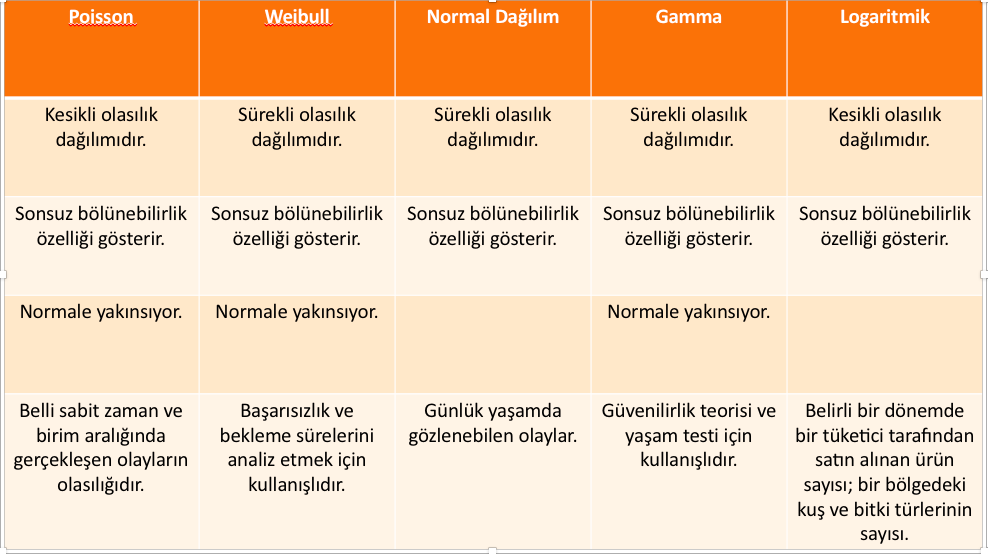